Correlation between Ad spent and Shopify Sales: 0.9433957062945021
Regression Model: Sales = 22997.17 + 1.63 * Ad spent


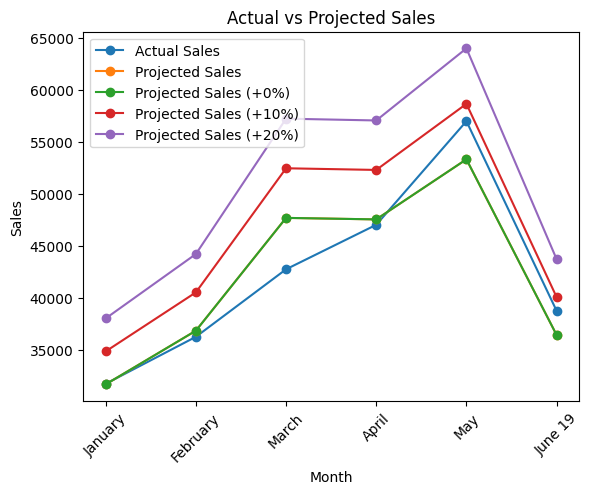

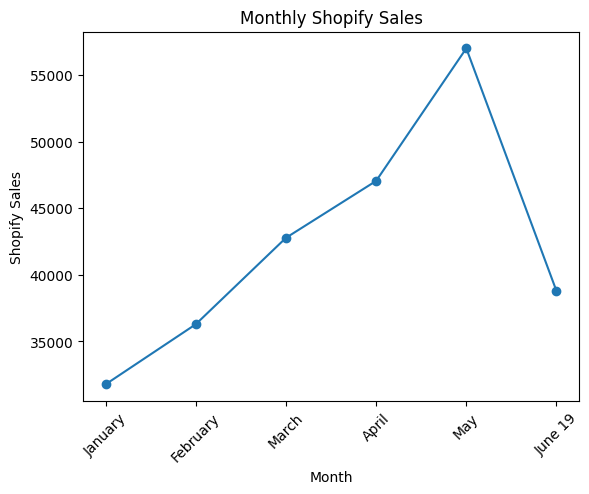

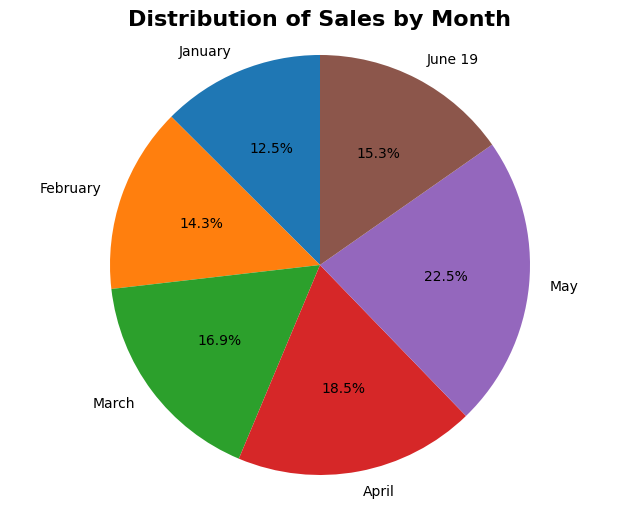

      Month  Ad spent  Shopify Sales  Number of Orders  Number of New orders  \
0   January   5343.63       31762.62               309                    75   
1  February   8508.95       36278.25               295                    72   
2     March  15165.56       42773.68               220                    62   
3     April  15076.42       47051.21               203                    55   
4       May  18621.89       57014.77               187                    44   
5   June 19   8255.59       38780.00                80                    46   

   Paused Subscriptions  Cancelled Subscriptions  Average Order Value  \
0                     0                       23               146.93   
1                    24                       42               146.53   
2                    13                       39               140.57   
3                    10                       36               155.27   
4                    23                       42               157.66   
5

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import gdown

def update_data():
    global df

    # Read CSV file
    file_path = 'data.csv'
    updated_df = pd.read_csv(file_path)

    # Check new columns
    new_columns = [col for col in updated_df.columns if col not in df.columns]
    if new_columns:
        # Add new columns to df and fill with null values
        for col in new_columns:
            df[col] = np.nan

    # Update columns of df
    for col in df.columns:
        if col in updated_df.columns:
            df[col] = updated_df[col]

    # Update the regression model.
    X = df['Ad spent'].values.reshape(-1, 1)
    y = df['Shopify Sales'].values.reshape(-1, 1)
    regression_model.fit(X, y)

    # Update the sales projections.
    df['Projected Sales'] = regression_model.predict(X)

    for percentage in increase_percentages:
        column_name = f'Projected Sales (+{percentage}%)'
        if column_name in df.columns:
            df[column_name] = df['Projected Sales'] * (1 + percentage/100)

    # Update the results and display them again.
    show_results()


def load_data():
    # Download the data.csv file from Google Drive
    file_url = 'https://drive.google.com/uc?id=1Mrs2Hs24RKubt79vGhNmpD0zlGcukX-t'
    file_path = 'data.csv'
    gdown.download(file_url, file_path, quiet=False)

    # Load data from the data.csv file
    df = pd.read_csv(file_path)
    return df


# Function to show the results
def show_results():
    global df

    # Step 1: Analyze the relationship between advertising and sales
    correlation = df['Ad spent'].corr(df['Shopify Sales'])
    print(f"Correlation between Ad spent and Shopify Sales: {correlation}")

    # Step 2: Build a regression model
    X = df['Ad spent'].values.reshape(-1, 1)
    y = df['Shopify Sales'].values.reshape(-1, 1)
    regression_model = LinearRegression()
    regression_model.fit(X, y)
    intercept = regression_model.intercept_[0]
    slope = regression_model.coef_[0][0]
    print(f"Regression Model: Sales = {intercept:.2f} + {slope:.2f} * Ad spent")

    # Step 3: Set budget increase scenarios
    increase_percentages = [0, 10, 20]  # Percentage increase scenarios

    # Step 4: Make projections
    df['Projected Sales'] = regression_model.predict(X)

    for percentage in increase_percentages:
        df[f'Projected Sales (+{percentage}%)'] = df['Projected Sales'] * (1 + percentage/100)

    # Step 5: Analyze the results
    target_sales = [75000, 100000]  # Target sales in each scenario
    for target in target_sales:
        df[f'Difference to Target ({target})'] = target - df['Projected Sales']

    # Step 6: Visualize the results
    plt.plot(df['Month'], df['Shopify Sales'], marker='o', label='Actual Sales')
    plt.plot(df['Month'], df['Projected Sales'], marker='o', label='Projected Sales')
    for percentage in increase_percentages:
        column_name = f'Projected Sales (+{percentage}%)'
        if column_name in df.columns:
            plt.plot(df['Month'], df[column_name], marker='o', label=column_name)

    plt.xlabel('Month')
    plt.ylabel('Sales')
    plt.title('Actual vs Projected Sales')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    # Sales distribution by month
    sales_data = df['Shopify Sales']
    months = df['Month']

    # Line chart
    plt.plot(df['Month'], df['Shopify Sales'], marker='o')
    plt.xlabel('Month')
    plt.ylabel('Shopify Sales')
    plt.title('Monthly Shopify Sales')
    plt.xticks(rotation=45)
    plt.show()

    # Pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(sales_data, labels=months, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Distribution of Sales by Month', fontsize=16, fontweight='bold')
    plt.show()

    # Show the results
    print(df)


# Show the updated results
show_results()



# Why do customers cancel, pause, or continue their subscription?

---

1. Subscription Cancellation:

Lack of satisfaction with the product or service.
Quality or performance issues with the product.
Change in customer preferences or needs.
Competition with more attractive offers or prices.
Negative experience with customer service.
Difficulties in accessing or using the subscription.
Financial problems or change in the customer's economic situation.

2. Subscription Pause:

Season or period of low use of the product or service.
Vacation or temporary absence of the customer.
Change in the availability of time to use the subscription.
Need for adjustments or changes to the subscription.
Evaluation of the cost-benefit relationship of the subscription.

3. Subscription Continuation:

Continued satisfaction with the product or service.
Perceived benefits and value of the subscription.
Positive experience with the product and the company.
Exclusive offers or advantages for subscribers.
Ease of use and convenience of the product or service.
Personalized relationship with the company or subscriber community.

# Analysis of Advertising Budget Allocation to Boost One-Year Sales Growth

To determine how much budget a stakeholder should allocate to advertising in order to increase sales in the next year, the following steps can be followed:

1. Establish sales goals: It is important to define specific, measurable, and realistic sales objectives to be achieved in the next year. For example, a goal could be set to increase sales by 20% compared to the previous year.

2. Analyze historical data: Review historical sales data and advertising expenses from previous years. Examine the relationship between advertising expenditure and sales growth. This will help identify patterns and determine the impact advertising has had in the past.

3. Calculate return on investment (ROI) of advertising: Analyze the performance of past advertising investments to determine the ROI. Calculate the relationship between the increase in sales generated by advertising and the cost of advertising investment. This will provide a reference for the expected performance of advertising investment.

4. Evaluate the market and competition: Conduct a market and competition analysis to understand the business environment. Consider factors such as market demand, competition, industry trends, and consumer behavior. This will help contextualize growth expectations and determine the relevance and effectiveness of advertising.

5. Define advertising strategies: Develop effective advertising strategies that align with sales objectives and target audience. Identify the most suitable advertising channels to reach the target audience and consider the use of multiple channels such as print media, digital platforms, social media, online advertising, among others.

6. Estimate the advertising budget: Based on the analyzed data, expected ROI, sales goals, and defined advertising strategies, estimate the budget required for advertising investment. Consider the costs associated with different advertising channels, campaign duration, and any other advertising-related expenses.

7. Monitor and adjust continuously: Once the advertising strategies are implemented, continuously monitor campaign performance and sales. Make adjustments to the budget and strategies if necessary, based on results and changing market conditions.

It is important to note that determining the advertising budget is not an exact science and may require adjustments over time. Additionally, it is recommended to have marketing and advertising professionals who can provide specialized advice and support in making decisions related to advertising investment.

# Calculating the Probability of Customers Cancelling, Pausing, or Continuing the Subscription

To calculate the probability of customers canceling, pausing, or continuing their subscription, we would need additional data that indicates the relevant variables influencing these decisions. The current provided data (Ad spent, Shopify Sales, Paused Subscriptions, Cancelled Subscriptions) allows us to analyze the relationship between advertising expenditure and sales but does not directly contain information about customer decisions.

To make an optimistic speculation about customer decisions, we could consider the following factors:

1. Improvement in product or service quality: If significant improvements are made to the offered product or service, customers are likely to continue their subscription or even increase their participation.

2. Attractive promotional offers: If discounts, special promotions, or other enticing incentives are offered to maintain the subscription, customers are more likely to continue as subscribers.

3. Exceptional customer service: Providing excellent customer service and personalized attention can increase customer retention and reduce cancellations.

4. Effective communication: Maintaining clear and regular communication with customers, informing them about new features, updates, or additional subscription benefits, can encourage their continued participation.

5. Loyalty programs: Implementing loyalty programs that reward customers for their loyalty and ongoing participation can influence their decision to remain subscribers.

It is important to note that these factors are speculative and are not based directly on the provided data. To obtain a more accurate and informed assessment of the probabilities of cancellation, pause, or continuation of the subscription, a more detailed analysis would be required, including surveys or customer satisfaction studies.

# Conclusión

In conclusion, the analysis conducted in the study provides us with important insights and recommendations:

1. Relationship between advertising and sales: There is observed correlation between advertising expenditure and Shopify sales. This indicates that an increase in advertising investment can have a positive impact on sales.

2. Sales projections: Using a linear regression model, future sales projections were generated based on advertising expenditure. These projections can serve as an initial estimation of expected sales.

3. Budget allocation analysis: To enhance sales growth, it is suggested to conduct a more comprehensive analysis considering factors such as sales goals, historical data, advertising ROI, market, and competition. This will allow for a more precise determination of the budget to allocate to advertising.

4. Monthly sales distribution: Graphs were presented showing the distribution of Shopify sales throughout the months. This can help identify seasonal patterns or trends that may influence advertising strategy planning.

5. Reasons for subscription cancellation, pause, or continuation: Possible reasons for customers canceling, pausing, or continuing their subscription were provided. These factors can serve as a guide to better understand customer decisions and develop retention strategies.

It is important to note that while analysis and recommendations have been provided, the results and conclusions are based on the data and assumptions presented in the study. For more accurate and reliable results, it is recommended to have more comprehensive data and conduct more detailed analyses. Additionally, it is important to adapt strategies and decisions to the specific reality of each business and market.